In [5]:
%matplotlib widget
from bmcs_shell.api import *
import numpy as np
import matplotlib.pyplot as plt

# WB curved slab demonstrator

## Geometry

In [6]:
wb_shell = WBTessellation4PEx(
                         a=1000/4,
                         b = 1615/4, 
                         c = 645/4, 
                         e_x = 286/4,
                         #gamma=0.683, # a value of gamma = 0.75 was estimated from normals, but a CAD comparison showed that 0.75 doesn't lead to closer geometry to the scanned 
                         gamma=np.pi/2,
                         n_phi_plus=2, 
                         n_x_plus=2, 
                         wireframe_width=1,
                        ##---- Trimming function works only in WBTessellation4P ----##
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
#                          align_outer_nodes_along_x=True,
)
wb_shell.interact()

wb_cell_default - WBTessellation4PEx
update_wb_cell_params - WBTessellation4PEx
X_Ia_no_constraint - WBTessellation4PEx
delta_x - WBCell4ParamEx
X_Ia - WBCell4ParamEx
I_Fi - WBCell4ParamEx
idx_of_facets_to_trim - WBTessellation4PEx


<lambdifygenerated-25>:2: RuntimeWarning: invalid value encountered in arcsin
  return arcsin((-a*sin(2*arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))*tan(gamma) + a*sin(2*arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))/cos(gamma) + 2*(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2*sqrt(2*a**2*sin(gamma)/cos(gamma)**2 + a**2 - 2*a**2/cos(gamma)**2 + b**2)/(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2) - sqrt(2*a**2*sin(gamma)/cos(gamma)**2 + a**2 - 2*a**2/cos(gamma)**2 + b**2))/(a*(-tan(gamma) + cos(gamma)**(-1.0)) + sqrt(-a**2*(-tan(gamma) + cos(gamma)**(-1.0))**2 + b**2)*(a*(-tan(gamma) + cos(gamma)**(-1.0)) + 2*a*(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2*tan(gamma)/(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2) - 2*a*(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2/((2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)*cos(gamma)) -

Exception occurred in traits notification handler for event object: TraitChangeEvent(object=<bmcs_shell.folding.geometry.wb_tessellation.wb_tessellation_4p_ex.WBTessellation4PEx object at 0x30a85e210>, name='gamma', old=1.5707963267948966, new=1.5706963267948966)
Traceback (most recent call last):
  File "/Users/gui/Documents/VSCode/bmcs_env/lib/python3.12/site-packages/ipywidgets/widgets/widget_selection.py", line 133, in findvalue
    return next(x for x in array if compare(x, value))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gui/Documents/VSCode/bmcs_env/lib/python3.12/site-packages/ipywidgets/widgets/widget_selection.py", line 242, in _validate_value
    return findvalue(self._options_values, value, self.equals) if value is not None else None
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gui/Documents/VSCo

update_wb_cell_params - WBTessellation4PEx
X_Ia_no_constraint - WBTessellation4PEx
delta_x - WBCell4ParamEx
X_Ia - WBCell4ParamEx
update_wb_cell_params - WBTessellation4PEx


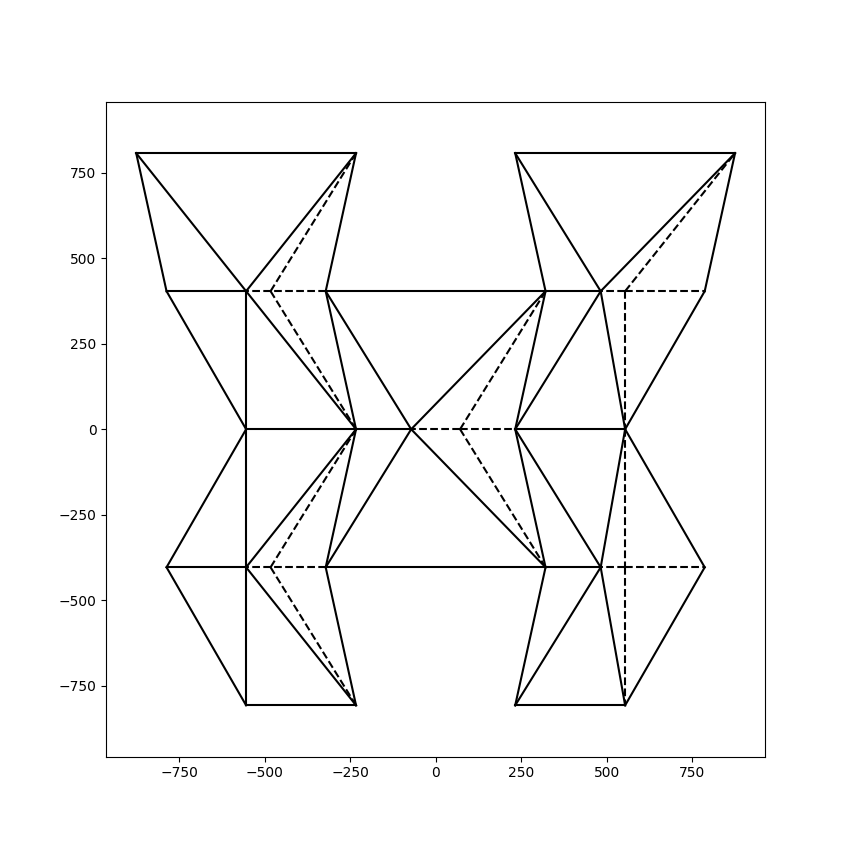

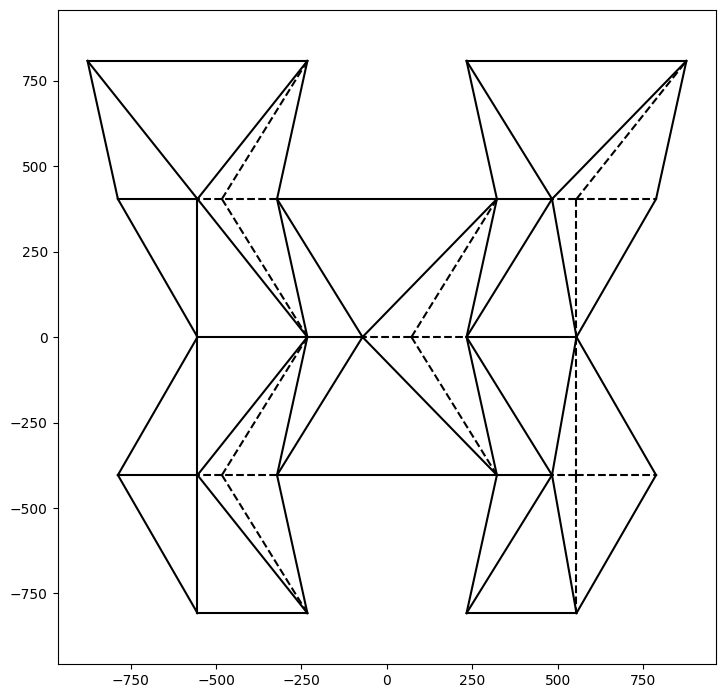

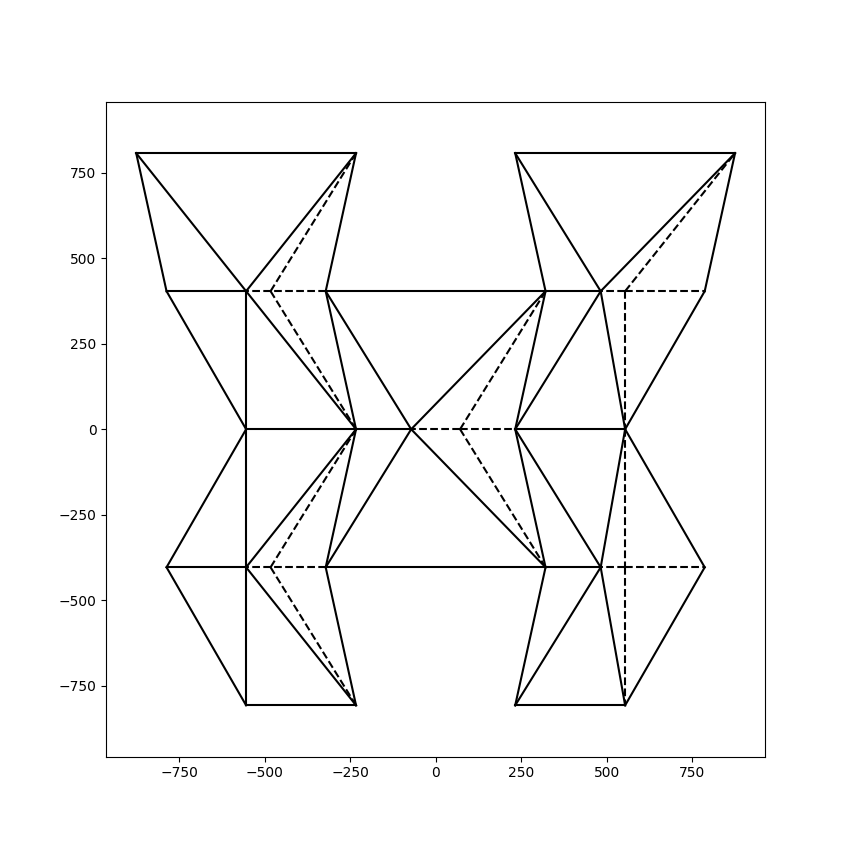

In [7]:
fig, ax = wb_shell.plot_folding_pattern()
fig
# fig.savefig('folding_patt.pdf')

In [8]:
WBGeoUtils.export_obj_file(wbt4p_ex, 'h_600_w_600_index_2_ex_100.obj')

NameError: name 'wbt4p_ex' is not defined

In [ ]:
import sympy as sp

a, b, c = sp.symbols('a, b, c', positive=True)
u_2, u_3 = sp.symbols('u_2, u_3', positive=True)
gamma = sp.symbols('gamma', positive=True)
    
    

U0_a = sp.Matrix([a, b, 0])
W0_a = sp.Matrix([c, 0, 0])
UW0_a = W0_a - U0_a
L2_U_0 = (U0_a.T * U0_a)[0]
L2_UW_0 = (UW0_a.T * UW0_a)[0]

U1_a = sp.Matrix([a, u_2, u_3])
W1_a = sp.Matrix([c * sp.sin(gamma), 0, c * sp.cos(gamma)])
UW1_a = U1_a - W1_a
L2_U_1 = (U1_a.T * U1_a)[0]
L2_UW_1 = (UW1_a.T * UW1_a)[0]

u2_sol = sp.solve(L2_U_1 - L2_U_0, u_2)[0]
u3_sol = sp.solve((L2_UW_1 - L2_UW_0).subs(u_2, u2_sol), u_3)[0]
u_3_ = u3_sol
u_2_ = u2_sol.subs(u_3, u3_sol)
u_2_, u_3_

In [ ]:
import sympy as sp

# Define symbols
a, b, c, gamma = sp.symbols('a b c gamma', real=True, positive=True)

# Define the numerator and denominator of cos(theta)
num = (
    c**2 * sp.cos(gamma)**2 
    - 2 * a * c * (1 - sp.sin(gamma)) 
    + 2 * (a**2 * (1 - sp.sin(gamma))**2) / sp.cos(gamma)**2 
    - b**2
)

denom = (
    c**2 * sp.cos(gamma)**2 
    - 2 * a * c * (1 - sp.sin(gamma)) 
    + b**2
)

# Define cos(theta)
cos_theta = num / denom

# Solve for gamma when cos(theta) = 1
eq = sp.Eq(cos_theta, 1)
gamma_solutions = sp.solve(eq, b)
gamma_solutions

# given a and gamma, solver for b
a_ = 1000/4
c_ = 645/4
gamma_ = np.pi/4
b_ = sp.solve(cos_theta.subs({a: a_, gamma: gamma_, c: c_}), b)
b_



[104.081097658949]

In [ ]:
wb_shell = WBTessellation4PEx(
                         a=1000/4,
                         b = 104.081097658949, 
                         c = 1000/4, 
                         e_x = 286/4,
                         #gamma=0.683, # a value of gamma = 0.75 was estimated from normals, but a CAD comparison showed that 0.75 doesn't lead to closer geometry to the scanned 
                         gamma=np.pi/4,
                         n_phi_plus=4, 
                         n_x_plus=4, 
                         wireframe_width=1,
                        ##---- Trimming function works only in WBTessellation4P ----##
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
#                          align_outer_nodes_along_x=True,
)
wb_shell.interact()

wb_cell_default - WBTessellation4PEx
update_wb_cell_params - WBTessellation4PEx
setup_plot - WB Tessellation 4P
X_Ia_trimmed - WB Tessellation 4P
is_trimmed - WB Tessellation 4P
X_Ia - WB Tessellation 4P
X_Ia_no_constraint - WBTessellation4PEx
unique_node_map - WB Tessellation 4P
X_cells_Ia - WB Tessellation 4P
delta_x - WBCell4ParamEx
X_Ia - WBCell4ParamEx
get_phi_range - WB Tessellation 4P
get_X_x_range - WB Tessellation 4P
get_X_phi_range - WB Tessellation 4P
get_phi_range - WB Tessellation 4P
node_match_threshold - WB Tessellation 4P
cells_in_out_xyj - WB Tessellation 4P
F_cfi - WB Tessellation 4P
I_Fi_ - WB Tessellation 4P
unique_node_map - WB Tessellation 4P
node_match_threshold - WB Tessellation 4P
I_cells_Fi - WB Tessellation 4P
I_Fi - WBCell4ParamEx
n_cells - WB Tessellation 4P
cell_map - WB Tessellation 4P
get_X_x_range - WB Tessellation 4P
get_X_phi_range - WB Tessellation 4P
get_phi_range - WB Tessellation 4P
n_cells - WB Tessellation 4P
cell_map - WB Tessellation 4P
get_X_

/Users/gui/Documents/bmcs_folder/bmcs_virtual/lib/python3.12/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


: 

: 